In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import factorial
from scipy.special import erfinv, comb
from scipy.stats import uniform, binom, norm
from dataclasses import dataclass
from sklearn.metrics import accuracy_score

import utils

# Section 1: Generating Data from a Specific Distribution

Let's recap some concepts and formalize them to facilitate coding. Don't worry, you will be guided throughout the entire assignment!

A random variable $X$ is a function that represents a random phenomenon, meaning its exact value cannot be determined. However, probabilities can be assigned to a set of possible values it can take. For example, if $X$ has a uniform distribution on $[2, 4]$, we cannot determine the exact value of $X$, but we can say with a probability of $1$ that the value lies between $[2, 4]$. We can also say that:

$$\mathbf P(X \leq 3) = \frac{1}{2}$$

where $3$ is the midpoint of the interval $[2, 4]$. Therefore, you have learned that a continuous random variable is associated with a function called the probability density function (PDF), which encodes the probability of the random variable falling within a given range. In other words, if $X$ is a continuous random variable and $f$ is its PDF, then:

$$\mathbf P(a \leq X \leq b) = \text{Area under } f \text{ between } a \text{ and } b$$

In the discrete case, $\mathbf P(X = a) = f(a)$. In any case, $\mathbf P(-\infty < X < +\infty) = 1$ because a random variable takes values on real numbers, and you're covering all possible outcomes.

Another function associated with a random variable is the cumulative distribution function (CDF), denoted as $F$. It represents the probability that a random variable $X$ will be less than or equal to $x$, for any $x \in \mathbb{R}$:

$$F(x) := \mathbf P(X \leq x), \quad \forall x \in \mathbb{R}$$

The CDF is a non-decreasing function and approaches $1$ as $x$ approaches infinity because it represents a probability and must yield a value between $0$ and $1$.

In the lectures, you learned that if $X$ is a random variable with CDF $F$, then $F(X)$ follows a uniform distribution between $0$ and $1$. In other words, the new random variable $F(X)$ will be uniformly distributed between $0$ and $1$. This opens up the possibility of generating artificial data with any desired distribution, given that we know $F$. The process is as follows:

1. Generate a random value $y$ uniformly from the interval $[0, 1]$.
2. Compute $F^{-1}(y)$, which is the inverse function of $F$ evaluated at $y$.

It can be shown that if $Y$ follows a uniform distribution between $0$ and $1$, then the random variable $F^{-1}(Y)$ has the same distribution as $X$.

Therefore, by computing the inverse of $F$, you can generate artificial data from any known distribution! This is an incredibly powerful technique, isn't it?

So far in the course, you have encountered three common probability distributions:
- Uniform
- Gaussian
- Binomial

In the first part of this assignment, you will code a random generator for each of the above distributions!


## Exercise 1: Uniform Generator

The natural first step is to create a function capable of generating random data that comes from the uniform distribution. You will not be coding a [pseudo-random number generator](https://en.wikipedia.org/wiki/Pseudorandom_number_generator) (this is outside the scope of this assignment) but instead you will use a predefined function that handles this for you. If you are unsure where you can find such a function take a look at the [numpy.random.uniform](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html) function.

In [2]:
def uniform_generator(a, b, num_samples=100):
    """
    Generates an array of uniformly distributed random numbers within the specified range.

    Parameters:
    - a (float): The lower bound of the range.
    - b (float): The upper bound of the range.
    - num_samples (int): The number of samples to generate (default: 100).

    Returns:
    - array (ndarray): An array of random numbers sampled uniformly from the range [a, b).
    """

    np.random.seed(42)

    ### START CODE HERE ###
    array = np.random.uniform(a, b, num_samples)
    ### END CODE HERE ###

    return array

## Exercise 2:  Gaussian Generator

With your uniform data generator ready you can go ahead and create generators for the other distributions. In order to do this you will need the inverse `CDF` for the distribution you wish to create data for. 

### 2.1 Inverse CDF - Gaussian

Let's start with a Normal Distribution generator. In the case of the Gaussian distribution finding the inverse is a bit challenging because the CDF doesn't have a closed analytical expression.

The closed formula uses a function called the Gaussian error function, denoted as $\text{erf}(x)$. However, you don't need to implement it or its inverse for this assignment. These functions are important in statistics, and there are many libraries available that provide their implementations.

For instance, you can use [scipy.special.erf](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.erf.html) and [scipy.special.erfinv](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.erfinv.html#scipy.special.erfinv) to compute the erf function and its inverse. Alternatively, you can find an implementation of the erf function in [math.erf](https://docs.python.org/3/library/math.html#math.erf) from the Python math library.

If $X \sim N(\mu, \sigma)$, then the CDF $F(x)$ can be expressed as:

$$y = F(x) = \frac{1}{2} \left[ 1 + \text{erf}\left( \frac{x - \mu}{\sigma \sqrt{2}} \right) \right].$$

With some simple calculations and denoting ${\text{erf}}^{-1}$ as the inverse of the $\text{erf}$ function, it can be shown that:

$$x = F^{-1}(y) = \sigma \sqrt{2} \cdot \text{erf}^{-1}(2y - 1) + \mu.$$


In [5]:
def inverse_cdf_gaussian(y, mu, sigma):
    """
    Calculates the inverse cumulative distribution function (CDF) of a Gaussian distribution.

    Parameters:
    - y (float or ndarray): The probability or array of probabilities.
    - mu (float): The mean of the Gaussian distribution.
    - sigma (float): The standard deviation of the Gaussian distribution.

    Returns:
    - x (float or ndarray): The corresponding value(s) from the Gaussian distribution that correspond to the given probability/ies.
    """
    ### START CODE HERE ###
    y = np.clip(y, 0, 1)
    x = sigma * np.sqrt(2) * erfinv(2*y - 1) + mu
    ### END CODE HERE ###

    return x

### 2.2 Gaussian Generator

Now that you have all the necessary information, you can create a generator for data that follows a Gaussian distribution with a specified $\mu$ and $\sigma$. Similar to the generator for uniformly distributed data, the `gaussian_generator` function should allow you to specify the number of samples to generate. **Make sure to utilize the functions you have defined earlier in the assignment.**

In [10]:
def gaussian_generator(mu, sigma, num_samples):
    ### START CODE HERE ###

    # Generate an array with num_samples elements that distribute uniformally between 0 and 1
    u = np.random.random(num_samples)

    # Use the uniform-distributed sample to generate Gaussian-distributed data
    # Hint: You need to sample from the inverse of the CDF of the distribution you are generating
    array = inverse_cdf_gaussian(u, mu, sigma)
    ### END CODE HERE ###

    return array

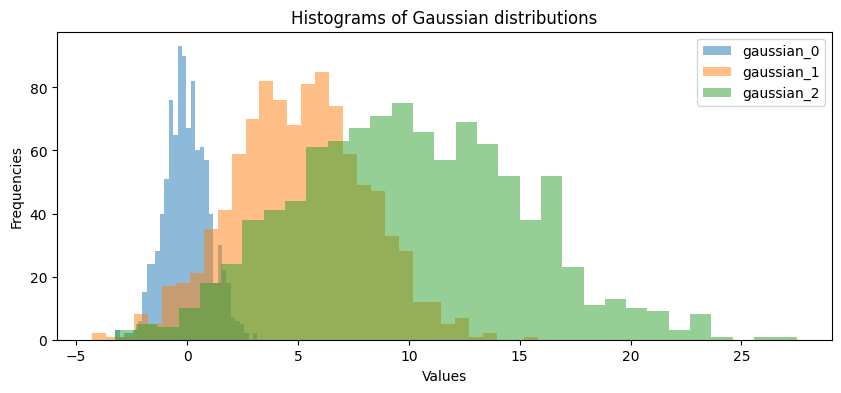

In [11]:
# Test your function

gaussian_0 = gaussian_generator(0, 1, 1000)
gaussian_1 = gaussian_generator(5, 3, 1000)
gaussian_2 = gaussian_generator(10, 5, 1000)

utils.plot_gaussian_distributions(gaussian_0, gaussian_1, gaussian_2)

## Exercise 3: Binomial Generator

### 3.1 Inverse CDF - Binomial

If $X \sim \text{Binomial}(n,p)$, then its PMF is given by:

$$P(X = k) = {n \choose k}p^{k}(1-p)^{n-k}.$$

Therefore, if $0 \leq x \leq n$, its CDF is given by:

$$F(x) = P(X \leq x) = P(X = 0) + P(X = 1) + \ldots + P(X = \lfloor x \rfloor) = \sum_{k=0}^{\lfloor x \rfloor} {n \choose k}p^{k}(1-p)^{n-k}.$$

Here, $\lfloor x \rfloor$ denotes the [floor function](https://en.wikipedia.org/wiki/Floor_and_ceiling_functions), which returns the greatest integer less than or equal to $x$. For example, $\lfloor 2.9 \rfloor = 2$ and $\lfloor 1.2 \rfloor = 1$. This function is necessary because the domain of $F$ is the entire set of real numbers, but $P(X = k)$ is non-zero only for positive integer values between 0 and $n$

If $x > n$, then $F(x) = 1$. It is important to note that the expression for $F(x)$ can become complex and messy, and there is no closed-form expression for the inverse function $F^{-1}$ in this case. However, statistical libraries provide implementations of the inverse CDF using [generalized quantile functions](https://en.wikipedia.org/wiki/Cumulative_distribution_function#Inverse_distribution_function_.28quantile_function.29). You can refer to [scipy.stats.binom](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html) for an example of a library that implements these functions. In particular, the `scipy.stats.binom.ppf` function is what you need. Since the `binom` class is already imported, you can use `help(binom)` to explore its parameters and functions. The function you will need is located in the "Methods" section: `ppf`.


In [12]:
def inverse_cdf_binomial(y, n, p):
    """
    Calculates the inverse cumulative distribution function (CDF) of a binomial distribution.

    Parameters:
    - y (float or ndarray): The probability or array of probabilities.
    - n (int): The number of trials in the binomial distribution.
    - p (float): The probability of success in each trial.

    Returns:
    - x (float or ndarray): The corresponding value(s) from the binomial distribution that correspond to the given probability/ies.
    """

    ### START CODE HERE ###
    x = binom.ppf(y, n, p)
    ### END CODE HERE ###

    return x

In [ ]:
def binomial_generator(n, p, num_samples):
    """
    Generates an array of binomially distributed random numbers.

    Args:
        n (int): The number of trials in the binomial distribution.
        p (float): The probability of success in each trial.
        num_samples (int): The number of samples to generate.

    Returns:
        array: An array of binomially distributed random numbers.
    """
    ### START CODE HERE ###

    # Generate an array with num_samples elements that distribute uniformally between 0 and 1
    u = np.random.uniform(0,1,num_samples)

    # Use the uniform-distributed sample to generate binomial-distributed data
    # Hint: You need to sample from the inverse of the CDF of the distribution you are generating
    array = binom.ppf(u, n, p)
    ### END CODE HERE ###

    return array

In [ ]:
def pdf_uniform(x, a, b):
    """
    Calculates the probability density function (PDF) for a uniform distribution between 'a' and 'b' at a given point 'x'.

    Args:
        x (float): The value at which the PDF is evaluated.
        a (float): The lower bound of the uniform distribution.
        b (float): The upper bound of the uniform distribution.

    Returns:
        float: The PDF value at the given point 'x'. Returns 0 if 'x' is outside the range [a, b].
    """
    ### START CODE HERE ###
    pdf = None
    ### END CODE HERE ###

    return pdf